In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import os
import openpyxl

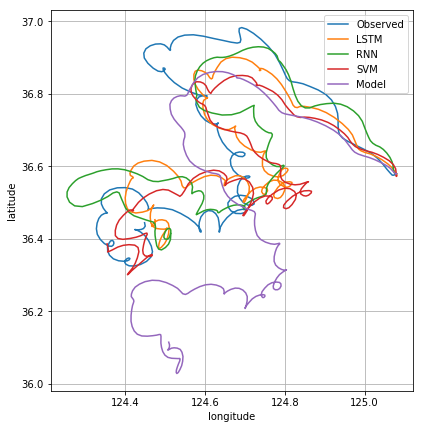

In [18]:
#pred_ori = openpyxl.load_workbook('./Result/old/corr_result/ori01_ep2500.xlsx')
pred_mid = openpyxl.load_workbook('./Result/d2_result/paper_graph2.xlsx')
obs = openpyxl.load_workbook('./Result/d2_result/obs.xlsx')

corr_point = open('./Result/d2_corrected_wind/wind_u/correction_wind_u_07_index.dat')
read_corr_point = np.loadtxt(corr_point)
corr_point.close()

#sheet_name = '03_1'

sheet = []
sheet.append(obs.get_sheet_by_name('case01'))
#sheet.append(pred_ori.get_sheet_by_name(sheet_name))
sheet.append(pred_mid.get_sheet_by_name('Ori'))
sheet.append(pred_mid.get_sheet_by_name('RNN'))
sheet.append(pred_mid.get_sheet_by_name('Auto'))
sheet.append(pred_mid.get_sheet_by_name('Model'))

d_lon = 125.07959    # case 01
d_lat = 36.57883

#d_lon = 125.4192    # case 05
#d_lat = 36.25787

#d_lon = 125.4081    # case 06
#d_lat = 36.58254

#d_lon = 125.7389    # case 07
#d_lat = 36.58102

#d_lon = 125.999    # case 2-7
#d_lat = 32.8439

#d_lon = 125.8338
#d_lat = 33.0041

a1 = sheet[0]['A']
a2 = sheet[0]['B']

lon = []
lat = []

for i in range(len(a1)-1) :
    lon.append(a1[i+1].value)
    lat.append(a2[i+1].value)
    
plt.plot(lon, lat, label='Observed')
    
    
a1 = sheet[1]['A']
a2 = sheet[1]['B']

lon = [d_lon]
lat = [d_lat]

for i in range(len(a1)-1) :
    lon.append(lon[i] + a1[i+1].value)
    lat.append(lat[i] + a2[i+1].value)

plt.plot(lon, lat, label='LSTM')
    
    
a1 = sheet[2]['A']
a2 = sheet[2]['B']

lon = [d_lon]
lat = [d_lat]

for i in range(len(a1)-1) :
    lon.append(lon[i] + a1[i+1].value)
    lat.append(lat[i] + a2[i+1].value)

plt.plot(lon, lat, label='RNN')
    
    
a1 = sheet[3]['A']
a2 = sheet[3]['B']

lon = [d_lon]
lat = [d_lat]

for i in range(len(a1)-1) :
    lon.append(lon[i] + a1[i+1].value)
    lat.append(lat[i] + a2[i+1].value)

plt.plot(lon, lat, label='SVM')


a1 = sheet[4]['A']
a2 = sheet[4]['B']

lon = []
lat = []

for i in range(len(a1)-1) :
    lon.append(a1[i+1].value)
    lat.append(a2[i+1].value)

plt.plot(lon, lat, label='Model')


lon = np.asarray(lon)
lat = np.asarray(lat)

#lat = np.array([1,2,17,20,16,3,5,4])
#lon = np.arange(len(y))

# Threshold above which the line should be red
threshold = read_corr_point

# Create line segments: 1--2, 2--17, 17--20, 20--16, 16--3, etc.
segments_x = np.r_[lon[0], lon[1:-1].repeat(2), lon[-1]].reshape(-1, 2)
segments_y = np.r_[lat[0], lat[1:-1].repeat(2), lat[-1]].reshape(-1, 2)

# Assign colors to the line segments
#linecolors = ['red' if lon_[0] in threshold and lon_[1] in threshold else 'blue' for lon_ in segments_x]
    
linecolors = ['green' if i in threshold and i in threshold else 'green'
              for i in range(len(segments_x))]

# Stamp x,y coordinates of the segments into the proper format for the
# LineCollection
segments = [list(zip(lon_, lat_)) for lon_, lat_ in zip(segments_x, segments_y)]

# Create figure

ax = plt.axes()

# Add a collection of lines
#ax.add_collection(LineCollection(segments, colors=linecolors, label='Autoencoder'))
ax.grid(True)
ax.legend(loc = 'upper right')
ax.figure.set_size_inches(6.5, 7)
plt.xlabel('longitude')
plt.ylabel('latitude')
#plt.xlim([125.72, 126.21])
#plt.ylim([33.01, 33.33])
plt.show()

#fig = plt.gcf()
#fig.set_size_inches(9, 10)   # case05

#plt.rc('grid', linestyle=':')
#plt.grid(True)
#plt.legend(loc = 'upper right')


#linecolors

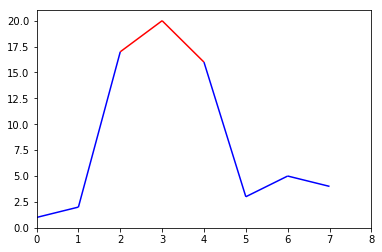

In [19]:
# The x and y data to plot
lat = np.array([1,2,17,20,16,3,5,4])
lon = np.arange(len(y))

# Threshold above which the line should be red
threshold = 15

# Create line segments: 1--2, 2--17, 17--20, 20--16, 16--3, etc.
segments_x = np.r_[x[0], x[1:-1].repeat(2), x[-1]].reshape(-1, 2)
segments_y = np.r_[y[0], y[1:-1].repeat(2), y[-1]].reshape(-1, 2)

# Assign colors to the line segments
linecolors = ['red' if y_[0] > threshold and y_[1] > threshold else 'blue'
              for y_ in segments_y]

# Stamp x,y coordinates of the segments into the proper format for the
# LineCollection
segments = [list(zip(x_, y_)) for x_, y_ in zip(segments_x, segments_y)]

# Create figure
plt.figure()
ax = plt.axes()

# Add a collection of lines
ax.add_collection(LineCollection(segments, colors=linecolors))

# Set x and y limits... sadly this is not done automatically for line
# collections
ax.set_xlim(0, 8)
ax.set_ylim(0, 21)

plt.show()

In [29]:
param = 'wind_v'
caseNum = '01'
corr_rate = 'mid'

#ori_data  = open('./Result/d2_original/case' + caseNum + '_' + param + '.dat')
#data  = open('./Result/d2_corrected_wind/' + param + '/correction_' + param + '_' + caseNum + '.dat')
#iData = open('./Result/d2_corrected_wind/' + param + '/correction_' + param + '_' + caseNum + '_index.dat')
#data  = open('./Result/case01_wind_v.dat')

ori_data  = open('./Result/old/Correction/case' + caseNum + '_' + param + '.dat')
data  = open('./Result/old/Correction/mid/correction_' + param + '_' + caseNum + '.dat')
iData = open('./Result/old/Correction/mid/correction_' + param + '_' + caseNum + '_index.dat')


read_ori_data = np.loadtxt(ori_data)
read_data = np.loadtxt(data)
read_index = np.loadtxt(iData, dtype=np.int32)

ori_data.close()
data.close()
iData.close()

"""col = list()
for i in range(len(read_data)):
    if i in read_index:
        col.append('r')
    else:
        col.append('b')
        
for i in range(len(read_data)):
    plt.scatter(x=i, y=read_data[i], s=10, c=col[i])"""

plt.plot(read_data, label='Correction')
plt.plot(read_ori_data, label='Original')
#plt.title('case' + caseNum + ' ' + param + ' ' + corr_rate)

plt.xticks(range(0, len(read_data), 10))

plt.ylim(-12, 7.5)   # case01 u,v  /  case05 u  /  case06  /  case07
#plt.ylim(-12, 12)   # case05 v

#plt.ylim(-5, 14)   # d2 u
#plt.ylim(-10, 12)   # d2 case08 u

plt.xlim(-2, 240)   # case01
#plt.xlim(-2, 110)   # case05

#plt.xlim(-2, 60)   # d2
#plt.xlim(-2, 94)    # d2 case08 u

plt.rc('grid', linestyle=':')
plt.grid(True)
plt.legend(loc = 'upper right')

plt.xlabel('time(h)')
plt.ylabel('value')
fig = plt.gcf()

fig.set_size_inches(14, 3.5)   # case01
#fig.set_size_inches(12, 6)   # case05

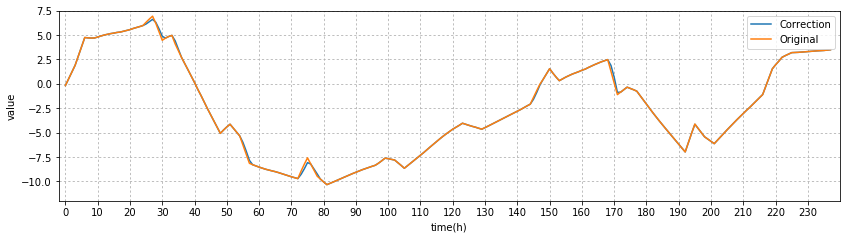

In [30]:
plt.show()

In [27]:
#data  = open('./Result/Correction/case' + caseNum + '_' + param + '.dat')
data  = open('./Result/autoencoder/corr_case01_w_v.txt')
data_ori  = open('./Data/Autoencoder/case01_w_v.txt')

read_data = np.loadtxt(data)
read_data_ori = np.loadtxt(data_ori)

data.close()
data_ori.close()
plt.title('case01_w_v Original')

plt.scatter(x=range(0, len(read_data)), y=read_data, s=10, c='b')
plt.xticks(range(0, len(read_data), 10))

#plt.ylim(-5, 7.5)   # case01 u,v  /  case05 u  /  case06  /  case07
#plt.ylim(-12, 12)   # case05 v

#plt.xlim(-2, 240)   # case01
plt.xlim(-2, 82)   # case05
plt.rc('grid', linestyle=':')
plt.grid(True)
fig = plt.gcf()

#fig.set_size_inches(25, 4)   # case01
fig.set_size_inches(12, 4)   # case05

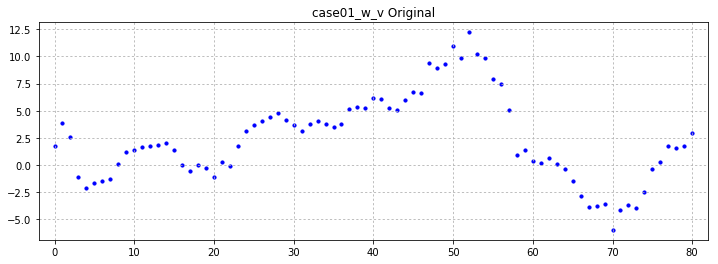

In [28]:
plt.show()

In [64]:
ori_data  = open('./Data/DataForCorr/RNN/2016/case01_wind_v.dat')
data  = open('./Result/autoencoder/corr_case01_wind_u.dat')

read_ori_data = np.loadtxt(ori_data)
read_data = np.loadtxt(data)

ori_data.close()
data.close()

plt.plot(read_data, label='Correction')
plt.plot(read_ori_data, label='Original')
#plt.title('case' + caseNum + ' ' + param + ' ' + corr_rate)

plt.xticks(range(0, len(read_data), 10))

#plt.ylim(-12, 7.5)
#plt.xlim(-2, 240)

plt.rc('grid', linestyle=':')
plt.grid(True)
plt.legend(loc = 'upper right')

plt.xlabel('time(h)')
plt.ylabel('value')
fig = plt.gcf()

fig.set_size_inches(14, 3.5)   # case01
#fig.set_size_inches(12, 6)   # case05

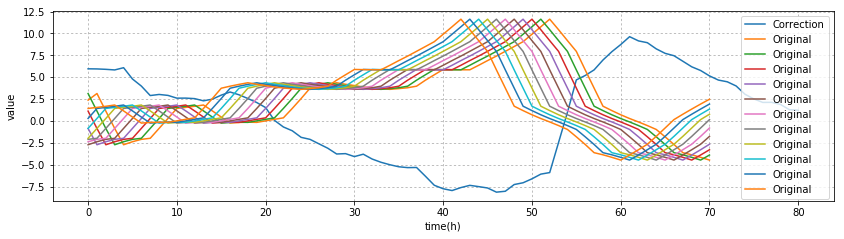

In [65]:
plt.show()